# Определение закономерностей успешных компьютерных игр

   Заказчик исследования интернет-магазин, который занимается продажей компьютерных игр по всему миру. 
   
   Цель исследования - выявить определяющие успешность игры закономерности. Это позволит заказчику сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
   
   В процессе исследования нам необходимо проверить динамику выпуска игр, проанализировать продажи по платформам, сделать выводы по перспективности платформ, составить портрет пользователя регионов NA, EU, JP.
   Необходимо также отработать две гипотезы заданные заказчиком:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
   Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года. Нам нужно сделать планирование компании за 2017 год.

Для выполнения задания нам необходимо выполнить следующие шаги:

- Изучить полученные данные
- Подготовить и почистить данные
- Проанализировать данные и отразить это выводом
- Проверить гипотезы выдвинутые заказчиком

# Изучение полученных данных

Согласно исходных данных, путь к файлам - /datasets/games.csv
Откроем и рассмотрим предоставленные данные

In [1]:
# импортируем необходимые нам библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats as st


#Подключим файлы с данными 
games = pd.read_csv('/datasets/games.csv')

In [2]:
print('Таблица games')
#Просмотрим общую информацию о данных
display(games.info())

#Просмотрим данные функцией describle
display(games.describe())

# Применим случайную выборку данных для первичного ознакомления
# Укажем параметр random_state=1, для сохранения результата при повторных запусках алгоритма, если нам
# вдруг понадобится

games.sample(10, random_state=1)

Таблица games
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14230,Rakushou! Pachi-Slot Sengen 5: Rio Paradise,PS2,2007.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14043,Nobunaga's Ambition II,3DS,2015.0,Strategy,0.00,0.00,0.04,0.00,NaN,NaN,NaN
3158,Up,DS,2009.0,Action,0.30,0.27,0.00,0.07,NaN,tbd,E
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
110,Mario Kart 8,WiiU,2014.0,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E
1988,ATV: Quad Power Racing,PS,2000.0,Racing,0.58,0.39,0.00,0.07,42.0,tbd,E
7130,64 de Hakken! Tamagotchi Minna de Tamagotchi W...,N64,1997.0,Misc,0.00,0.00,0.22,0.00,NaN,NaN,NaN
8849,Derby Stallion 64,N64,2001.0,Sports,0.00,0.00,0.15,0.00,NaN,NaN,NaN
14602,Star Wars: The Force Unleashed II,PC,2010.0,Action,0.03,0.00,0.00,0.00,59.0,5.8,T
106,Tekken 3,PS,1998.0,Fighting,3.27,2.22,1.40,0.29,96.0,9.1,T


Таблица содержит следующие данные:

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

 

Мы видим около 16,7 тысяч записей, однако много записей не полные. Часть записей не содержит год выпуска, очень много записей не содержат оценок критиков и оценок игроков. В оценке игроков есть кроме оценок буквенная оценка tbd. Для дальнейшей проработки понадобится принять решение причинах пропусков и о необходимости их заполнений. Необходимо понять, что такое tbd и перевести столбец оценки пользователей в формат float. Чтобы избежать ошибок нужно будет перевести название столбцов и жанров к одному образцу. Для удобства анализа столбец года выпуска лучше сделать состоящим из целых чисел. Так же для дальнейшего анализа необходимо добавить столбец с данными по суммарным продажам игры.

## Выводы

В целом данные относительно чистые. Требуется небольшая обработка и можно будет делать выводы

# Подготовка данных

По результатам просмотра, нам необходимо сделать следующие действия:
- перевести столбец оценки пользователей в формат float
- просмотреть отсутствующие данные и решить вопрос с их заполнением
- перевести название столбцов и жанров к одному образцу
- столбец года выпуска перевести в формат int
- добавить столбец с данными по суммарным продажам игры


Начнем с перевода перевести столбец оценки пользователей в формат float. Нам мешает значение tbd. Изучим его поподробнее:

In [3]:
#посмотрим выборку игр с таким рейтингом
games.query('User_Score == "tbd"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [4]:
#посмотрим, если ли взаимосвязь между продажами игры,годом выпуска, платформой и этим значением

display(games.query('User_Score == "tbd"')['JP_sales'].value_counts())
display(games.query('User_Score == "tbd"')['EU_sales'].value_counts())
display(games.query('User_Score == "tbd"')['NA_sales'].value_counts())
display(games.query('User_Score == "tbd"')['Year_of_Release'].value_counts())
display(games.query('User_Score == "tbd"')['Platform'].value_counts())

0.00    2342
0.01      16
0.03      11
0.02      11
0.05       7
0.06       6
0.04       5
0.09       3
0.08       2
0.16       2
0.11       2
0.13       2
0.18       2
0.25       2
0.12       2
0.31       1
0.86       1
0.10       1
0.26       1
0.15       1
0.14       1
0.20       1
0.17       1
0.47       1
Name: JP_sales, dtype: int64

0.00    1045
0.01     355
0.02     228
0.03     138
0.04      99
        ... 
0.91       1
2.59       1
0.54       1
0.85       1
1.35       1
Name: EU_sales, Length: 65, dtype: int64

0.02    182
0.03    167
0.05    156
0.04    155
0.01    154
       ... 
0.97      1
0.83      1
0.72      1
0.63      1
1.25      1
Name: NA_sales, Length: 95, dtype: int64

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2002.0    192
2007.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: Year_of_Release, dtype: int64

DS      756
Wii     440
GBA     262
PS2     240
XB      150
PSP     123
GC      103
PS3      87
X360     84
3DS      56
PC       49
PS       45
XOne     11
PSV       7
PS4       6
WiiU      5
Name: Platform, dtype: int64

Обычно сокращение tbd означает to be determined , "будет определен позднее" и означает, что не хватает оценок для выявления среднего если мы посмотрим аналитику по данному сокращению, то увидим, что подобные игры выпущены в основном в 2008-2011 годах, в основном предназначались для Nintendo DS, Wii, Game Boy Advance, PS2, и очень плохо продавались в Японии, которая является основным рынком для данных приставок. 
Возможно эти игры не смогли преодолеть какой-то предел, достаточный для получения оценки. Я не готов сам определить значение оценки пользователей. При этом эти записи для меня в основном не важны и они точно не относятся к успешным играм, закономерности которых нам нужно понять. Думаю я приравняю эти значения к неизвестным

In [5]:
# заменим tbd-оценки на пропуски

games['User_Score'] = games['User_Score'].replace('tbd', np.nan).astype('float')

# проверим столбец функцией descrybe

display(games['User_Score'].describe())

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: User_Score, dtype: float64

Заполнение пропусков:
- у нас есть два пропуска в столбце Название, два пропуска в столбце жанр и небольшое количество пропусков в графе года выпуска. Думаю я уберу данные записи, поскольку они не дадут мне данных для анализа и при этом не сильно исказят исследование.
- пропуски в столбцах оценок критиков и пользователей, а также пропуски в столбце рейтинга я заполнять не буду - приведенных данных мне хватит для расчета а внятно обосновать заполнения я не могу.

In [6]:
# удалим из дата фрейма строки с пропусками

games = games.dropna(subset=['Year_of_Release','Name','Genre']).reset_index(drop=True)

# проверим результат

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
Name               16444 non-null object
Platform           16444 non-null object
Year_of_Release    16444 non-null float64
Genre              16444 non-null object
NA_sales           16444 non-null float64
EU_sales           16444 non-null float64
JP_sales           16444 non-null float64
Other_sales        16444 non-null float64
Critic_Score       7983 non-null float64
User_Score         7463 non-null float64
Rating             9768 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Переведем название столбцов и жанров к одному образцу

In [7]:
# приведем название столбцов к одному образцу
games.columns = games.columns.str.lower()
# проверим результат
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
# приведем наименования к единому стилю

games['genre'] = games['genre'].str.lower()

# проверим результат

games['genre'].value_counts()

action          3307
sports          2306
misc            1721
role-playing    1481
shooter         1296
adventure       1293
racing          1226
platform         878
simulation       857
fighting         837
strategy         673
puzzle           569
Name: genre, dtype: int64

Переведем столбец года выпуска в формат int

In [9]:
# Переведем столбец года выпуска в формат int
games['year_of_release'] = games['year_of_release'].astype(int)

# проверим результат
games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

Добавим столбец с данными по суммарным продажам игры, так же, для удобства дальнейшего сравнения приведем оценку критиков и оценку пользоватлей в одни величины - чтобы потом их можно было бы отложить на одном графике. Для этого умножим пользовательскую оценку на 10

In [10]:
#просуммируем продажи по регионам 

games['total_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

#изменим столбец user_score

games['user_score'] = games['user_score'] * 10

# проверим результат

games.head(20)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
7,Wii Play,Wii,2006,misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,platform,14.44,6.94,4.70,2.24,87.0,84.0,E,28.32
9,Duck Hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


В окончании обработки, проверим наличие дубликатов в таблице

In [11]:
print('Количество явных дубликатов: ', games.duplicated().sum())

Количество явных дубликатов:  0


## Выводы

В процессе подготовки данных к анализу, мы привели столбец оценки пользователей в формат float, убрали значения, которые этому мешали и привели оценки пользователей в ту же размерность, что и оценки критиков.
Мы просмотрели отсутствующие данные, убрали строки с пропусками в столбце года выпуска, названия и жанра и оставили пропуски в столбцах рейтинга и оценок пользователей и критиков.
Мы привели название столбцов и жанров к одному образцу, что позволит снизить вероятность ошибки. Перевели столбец года выпуска в формат int и добавили столбец с данными по суммарным продажам игры, который понадобится нам далее. 

# Исследовательский анализ данных 

Задачи, которые поставлены заказчиком:

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.Не учитывайте в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Соотнесите выводы с продажами игр на других платформах.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? 

Выделяются ли жанры с высокими и низкими продажами?

Составить портрет пользователя каждого региона (NA, EU, JP), для чего необходимо определить:
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Оценим выпуск игр в разные годы согласно полученного нами среза данных

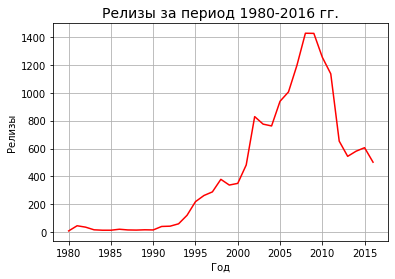

In [12]:
plt.plot(games.pivot_table(index='year_of_release', values='name', aggfunc='count'), 
         color='red')

plt.title('Релизы за период 1980-2016 гг.', fontsize=14)
plt.xlabel('Год')
plt.ylabel('Релизы')
plt.grid()

In [13]:
games.pivot_table(index='year_of_release', values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Похоже в 2008-2009 году был пик выпуска игр. Затем количество выпускаемых игр стало снижаться. Проверим что по популярности платформ. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим, за какой характерный срок появляются новые и исчезают старые платформы.

In [14]:
#сделаем сводку по платформам и годам выпуска

top_platforms = games.pivot_table(index='platform', values='total_sales', 
               aggfunc='sum').sort_values(by='total_sales', ascending=False)

# создадим топ-лист 10 платформ
top_10_platforms = top_platforms.head(10)

# проверим результат

top_10_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Верхние шесть платформ сильно отличаются по продажам. Построим по ним графики продаж по годам.

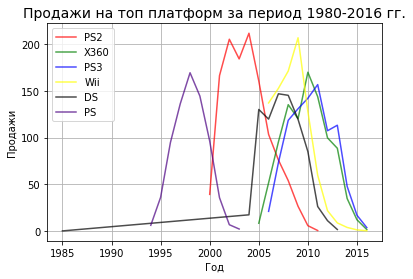

In [15]:
plt.plot(games.query('platform == "PS2"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='red', alpha=0.7, label='PS2')

plt.plot(games.query('platform == "X360"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='green', alpha=0.7, label='X360')

plt.plot(games.query('platform == "PS3"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='blue', alpha=0.7, label='PS3')

plt.plot(games.query('platform == "Wii"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='yellow', alpha=0.7, label='Wii')

plt.plot(games.query('platform == "DS"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='black', alpha=0.7, label='DS')

plt.plot(games.query('platform == "PS"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='indigo', alpha=0.7, label='PS')

plt.title('Продажи на топ платформ за период 1980-2016 гг.', fontsize=14)
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.legend()
plt.grid()

У нас появился, артефакт - проверим игру 1985 года, которая выпущена на платформе DS 

In [16]:
games.query('platform == "DS" & year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Поиск выдаёт год выпуска Strongest Tokyo University Shogi DS (DS) как 2010, это больше похоже на правду. Заменим год выпуска

In [17]:
games.loc[15704,'year_of_release'] = 2010

Перепостроим графики

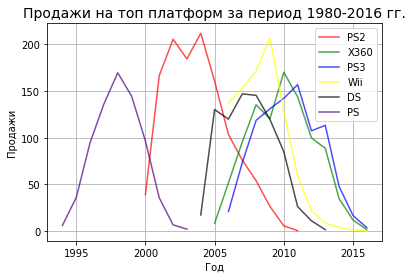

In [18]:
plt.plot(games.query('platform == "PS2"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='red', alpha=0.7, label='PS2')

plt.plot(games.query('platform == "X360"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='green', alpha=0.7, label='X360')

plt.plot(games.query('platform == "PS3"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='blue', alpha=0.7, label='PS3')

plt.plot(games.query('platform == "Wii"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='yellow', alpha=0.7, label='Wii')

plt.plot(games.query('platform == "DS"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='black', alpha=0.7, label='DS')

plt.plot(games.query('platform == "PS"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='indigo', alpha=0.7, label='PS')

plt.title('Продажи на топ платформ за период 1980-2016 гг.', fontsize=14)
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.legend()
plt.grid()

Похоже, срок жизни платформы составляет около 6-7 лет, после чего платформы сменяются. Обычно запуск новой платформы запускает резкий рост продаж. Резкое падение видимо с стремлением производителя сменить платформу.

Исходя из предположения актуальности платформы в течении 6-7 лет, я думаю, что меня будут интересовать данные за 2015 и 2016 год. Те платформы, которые демонстрируют взлет в последние годы, будут актуальны ещё около четырех лет и их можно использовать для построения прогноза на 2017 год. 
Рассмотрим актуальные платформы:

In [19]:
# отберем подходящие данные по платформам, по которым были релизы в 2016 и 2015 годах

display(games.query('year_of_release == 2015')['platform'].unique())
display(games.query('year_of_release == 2016')['platform'].unique())

array(['PS4', 'XOne', 'WiiU', '3DS', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

Из списка исчезла платфома PSP, поддержка которой официально закончилась очень давно. остальные платформы, думаю актуальны в настоящее время. Рассмотрим их внимательнее

In [20]:
platform_list = games.query('year_of_release == 2016')['platform'].unique()
actual_platform = games[games['platform'].isin(platform_list)]
display(actual_platform.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
7,Wii Play,Wii,2006,misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,platform,14.44,6.94,4.70,2.24,87.0,84.0,E,28.32
13,Wii Fit,Wii,2007,sports,8.92,8.03,3.60,2.15,80.0,77.0,E,22.70
14,Kinect Adventures!,X360,2010,misc,15.00,4.89,0.24,1.69,61.0,63.0,E,21.82
15,Wii Fit Plus,Wii,2009,sports,9.01,8.49,2.53,1.77,80.0,74.0,E,21.80
16,Grand Theft Auto V,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
23,Grand Theft Auto V,X360,2013,action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27


Проверим как ведут себя продажи на актуальных платформах

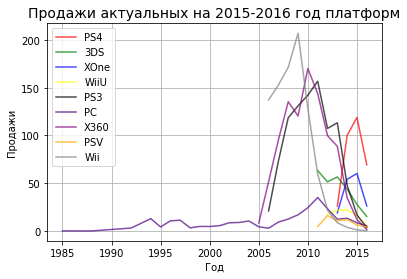

In [21]:
plt.plot(games.query('platform == "PS4"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='red', alpha=0.7, label='PS4')

plt.plot(games.query('platform == "3DS"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='green', alpha=0.7, label='3DS')

plt.plot(games.query('platform == "XOne"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='blue', alpha=0.7, label='XOne')

plt.plot(games.query('platform == "WiiU"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='yellow', alpha=0.7, label='WiiU')

plt.plot(games.query('platform == "PS3"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='black', alpha=0.7, label='PS3')

plt.plot(games.query('platform == "PC"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='indigo', alpha=0.7, label='PC')

plt.plot(games.query('platform == "X360"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='purple', alpha=0.7, label='X360')

plt.plot(games.query('platform == "PSV"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='orange', alpha=0.7, label='PSV')

plt.plot(games.query('platform == "Wii"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='gray', alpha=0.7, label='Wii')


plt.title('Продажи актуальных на 2015-2016 год платформ', fontsize=14)
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.legend()
plt.grid()

Похоже общий рынок игр переживает упадок. И также похоже, что мы не имеем всех данных за 2016 год, что в целом логично. При этом по выручке из актуальных платформ лидируют PS4, XOne и 3DS, а  Wii, X360 и PS3 стремительно теряют позиции. В принципе это логично и иллюстрирует смену поколений. Тот же PC неизменен с 1985 года.
В целом мне не хватает понимания актуальности платформы. Думаю, я хочу проверить актуальные платформы ещё и по числу релизов. Растет ли он.

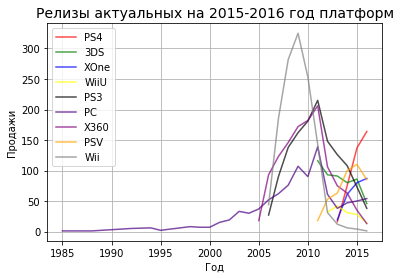

In [22]:
plt.plot(games.query('platform == "PS4"').pivot_table(
    index='year_of_release', values='name', aggfunc='count'),
         color='red', alpha=0.7, label='PS4')

plt.plot(games.query('platform == "3DS"').pivot_table(
    index='year_of_release', values='name', aggfunc='count'),
         color='green', alpha=0.7, label='3DS')

plt.plot(games.query('platform == "XOne"').pivot_table(
    index='year_of_release', values='name', aggfunc='count'),
         color='blue', alpha=0.7, label='XOne')

plt.plot(games.query('platform == "WiiU"').pivot_table(
    index='year_of_release', values='name', aggfunc='count'),
         color='yellow', alpha=0.7, label='WiiU')

plt.plot(games.query('platform == "PS3"').pivot_table(
    index='year_of_release', values='name', aggfunc='count'),
         color='black', alpha=0.7, label='PS3')

plt.plot(games.query('platform == "PC"').pivot_table(
    index='year_of_release', values='name', aggfunc='count'),
         color='indigo', alpha=0.7, label='PC')

plt.plot(games.query('platform == "X360"').pivot_table(
    index='year_of_release', values='name', aggfunc='count'),
         color='purple', alpha=0.7, label='X360')

plt.plot(games.query('platform == "PSV"').pivot_table(
    index='year_of_release', values='name', aggfunc='count'),
         color='orange', alpha=0.7, label='PSV')

plt.plot(games.query('platform == "Wii"').pivot_table(
    index='year_of_release', values='name', aggfunc='count'),
         color='gray', alpha=0.7, label='Wii')


plt.title('Релизы актуальных на 2015-2016 год платформ', fontsize=14)
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.legend()
plt.grid()

Очень сильно выделяется PS4, также растут XOne, стабилен PC и в целом хорошо показывает себя PSV. Остальное скорее всего нам не актуально, например для 3DS несмотря на неплохую выручку, заметно и постоянно падает количество релизов. 

Думаю можно сделать вывод, что актуальными платформами, продажи и релизы на которых в 2017 году будут интересны это PS4, XOne, PC и PSV.

In [24]:
# сформируем список актуальный платформ

ap_list = ['PS4','XOne', 'PC', 'PSV']

# сделаем срез данных по актуальному периоду 2015-2016 год,
# а также по актуальности платформ

games_ap = games[games['platform'].isin(ap_list) 
               & games['year_of_release'].isin(range(2015, 2017))]

# проверим результат

display(games_ap.head(15))

games_ap.info()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
77,FIFA 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.0,43.0,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
94,FIFA 17,PS4,2016,sports,0.66,5.75,0.08,1.11,85.0,50.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
105,Fallout 4,PS4,2015,role-playing,2.53,3.27,0.24,1.13,87.0,65.0,M,7.17
171,Uncharted 4: A Thief's End,PS4,2016,shooter,1.85,2.50,0.19,0.85,93.0,79.0,T,5.39
230,Uncharted: The Nathan Drake Collection,PS4,2015,action,2.07,1.71,0.08,0.76,86.0,81.0,T,4.62
241,Halo 5: Guardians,XOne,2015,shooter,2.78,1.27,0.03,0.41,84.0,64.0,T,4.49
244,Call of Duty: Infinite Warfare,PS4,2016,shooter,1.61,2.00,0.15,0.71,77.0,34.0,M,4.47


<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 31 to 16443
Data columns (total 12 columns):
name               767 non-null object
platform           767 non-null object
year_of_release    767 non-null int64
genre              767 non-null object
na_sales           767 non-null float64
eu_sales           767 non-null float64
jp_sales           767 non-null float64
other_sales        767 non-null float64
critic_score       399 non-null float64
user_score         431 non-null float64
rating             430 non-null object
total_sales        767 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 77.9+ KB


Оставшихся у нас данных достаточно для анализа.

In [25]:
# подготовим срезы по конкретным платформам для дальнейшей работы

ps4 = games_ap.query('platform == "PS4"')
xone = games_ap.query('platform == "XOne"')
pc = games_ap.query('platform == "PC"')
psv = games_ap.query('platform == "PSV"')

sum_list = [ps4, xone, pc, psv]
display(ps4.head(15))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
77,FIFA 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.0,43.0,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
94,FIFA 17,PS4,2016,sports,0.66,5.75,0.08,1.11,85.0,50.0,E,7.60
105,Fallout 4,PS4,2015,role-playing,2.53,3.27,0.24,1.13,87.0,65.0,M,7.17
171,Uncharted 4: A Thief's End,PS4,2016,shooter,1.85,2.50,0.19,0.85,93.0,79.0,T,5.39
230,Uncharted: The Nathan Drake Collection,PS4,2015,action,2.07,1.71,0.08,0.76,86.0,81.0,T,4.62
244,Call of Duty: Infinite Warfare,PS4,2016,shooter,1.61,2.00,0.15,0.71,77.0,34.0,M,4.47
288,Battlefield 1,PS4,2016,shooter,1.10,2.15,0.21,0.61,88.0,84.0,M,4.07
302,The Witcher 3: Wild Hunt,PS4,2015,role-playing,1.02,2.13,0.23,0.59,92.0,92.0,M,3.97


Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


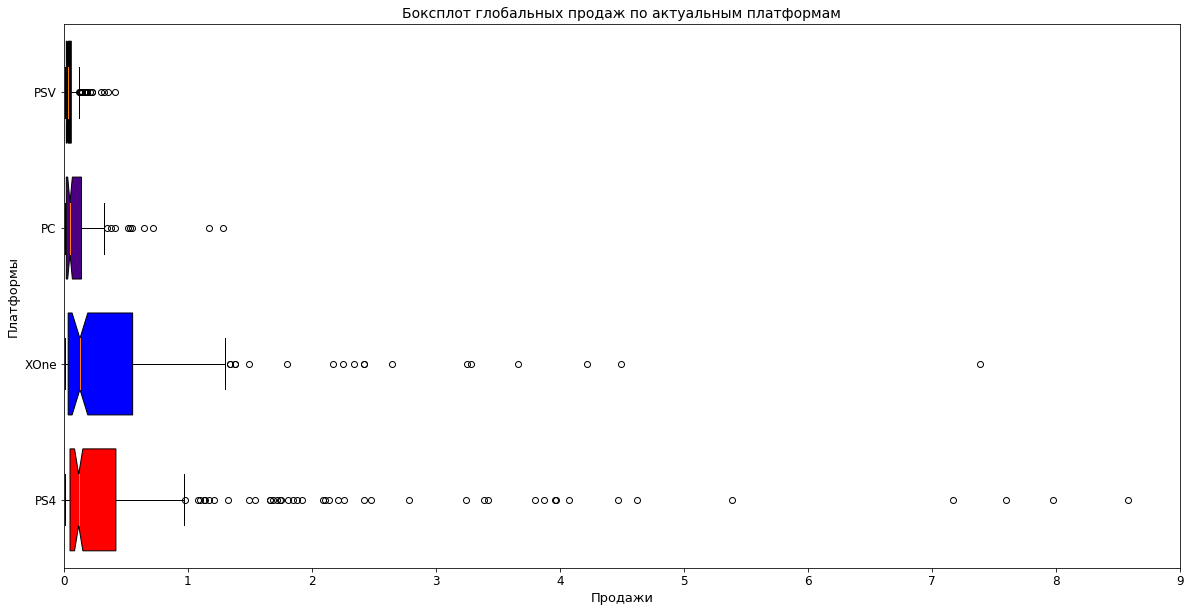

In [27]:
box = plt.boxplot(
    x=[ps4['total_sales'], xone['total_sales'], pc['total_sales'], psv['total_sales']], 
    vert=False, labels=ap_list, patch_artist=True, notch=True,
    widths=(0.75, 0.75, 0.75, 0.75))

# установим названия графика и осей

plt.title('Боксплот глобальных продаж по актуальным платформам', fontsize=14)
plt.xlabel('Продажи', fontsize=13)
plt.ylabel('Платформы', fontsize=13)

# раскрасим патчи

colors = ['red', 'blue', 'indigo', 'black']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# увеличим размер графика

fig = plt.gcf()
fig.set_size_inches(20, 10)

# увеличим шрифт тиков

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 9)

plt.show()

Похоже PS4 и XOne значительно продажнее и успешнее PC и PSV. И чем больше продаж, тем больше особо успешных продаж.

Давайте посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Попробуем построить диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

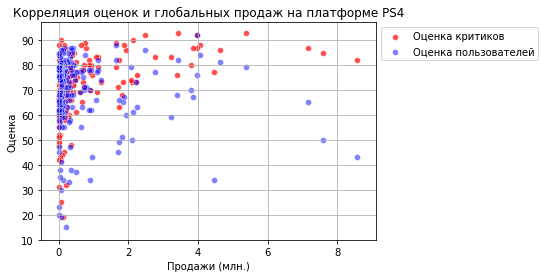

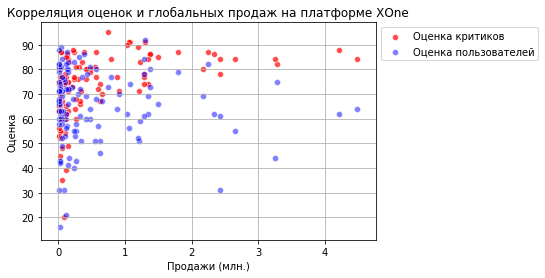

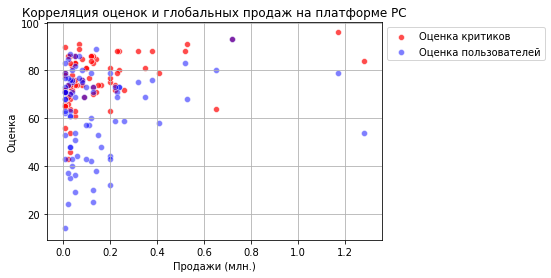

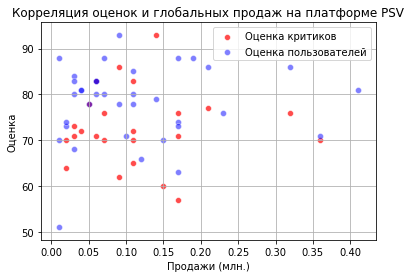

In [28]:
# визуализируем распределение продаж по платформам, в зависимости от оценок критиков
# и оценок пользователей

for i in range(len(sum_list)):
    
# создадим скаттерплот для оценки критика и пользователя

    sns.scatterplot(
        x=sum_list[i]['total_sales'], y=sum_list[i]['critic_score'], 
        color='red', alpha=0.7)
    
    sns.scatterplot(
        x=sum_list[i]['total_sales'], y=sum_list[i]['user_score'], 
        color='blue', alpha=0.5)
    
# подпишем график, оси, добавим сетку и легенду

    plt.title('Корреляция оценок и глобальных продаж на платформе ' + ap_list[i])
    plt.xlabel("Продажи (млн.)")
    plt.ylabel("Оценка")
    plt.grid()
    plt.legend(['Оценка критиков','Оценка пользователей'], 
          bbox_to_anchor=(1,1))
    plt.show()    

Похоже на большинстве проектов PS4, XOne и PC на самых больших хитах оценки критиков всегда большие, а вот оценка пользователей скорее средняя. Видимо корреляция между оценкой критиков и продажами есть, а вот корреляции между оценкой пользователей и продажами нет. 
По PSV же вообще непонятно, похоже особой зависимости продаж от оценок как пользователей, так и критиков нет. 

Рассмотрим общее распределение игр по жанрам. Есть ли самые продаваемые жанры? Выделяются ли жанры с высокими и низкими продажами?
Рассмотрим актуальные платформы

In [29]:
dft = games_ap.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index(drop=False)

dft

,genre,total_sales
0,shooter,96.06
1,action,69.54
2,sports,51.34
3,role-playing,37.87
4,racing,10.75
5,fighting,9.96
6,adventure,8.95
7,misc,5.37
8,simulation,3.36
9,platform,2.87


Проверим на всякий случай все платформы в актуальный временной период на распределение продаж по жанрам 

In [30]:
games.query('year_of_release >2015').pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index(drop=False)

,genre,total_sales
0,shooter,38.22
1,action,30.11
2,sports,23.49
3,role-playing,18.18
4,fighting,4.47
5,adventure,3.82
6,platform,3.23
7,racing,2.79
8,misc,2.60
9,simulation,1.89


Похоже распределение по жанрам сохраняется. Немного добавилось спорта, я думаю за счет бесконечных японских небольших платформ.

Проверим, может первый жанр делает продажи только за счет большего количества игр и большого количества бестселлеров. В принципе это то, что нам нужно для концентрации рекламной компании. Но проверим, может другие жанры имеют больше продаж в расчете на единицу игры.


In [31]:
games_ap.pivot_table(
    index='genre', values='total_sales', aggfunc='median').sort_values(
    by='total_sales', ascending=False).reset_index(drop=False)

,genre,total_sales
0,shooter,0.410
1,sports,0.120
2,fighting,0.100
3,platform,0.090
4,role-playing,0.085
5,strategy,0.065
6,racing,0.060
7,action,0.060
8,misc,0.060
9,simulation,0.040


shooter по прежнему на коне, а вот action похоже выезжает за счет большого количества игр и бестселлеров. Но в общем это именно то, что нам нужно для рекламной компании.	

Явно лидируют shooter action sports, их можно назвать очень продаваемыми. В противоположность жанр puzzle почти не продаётся. Явно выделяются по продажам несколько жанров, на которые приходятся основные продажи.

Попробуем составить портрет пользователя каждого региона (NA, EU, JP), какие платформы для него самые популярные? Какие жанры самые популярные? Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [32]:
# отсортируем данные по продажам на платформах и по регионам 
# за актуальный период

platform_sales = games.query(
    '2015 <= year_of_release <= 2017').pivot_table(
    index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index(drop=False)

# проверим результат

platform_sales

,platform,eu_sales,jp_sales,na_sales
0,3DS,7.39,23.55,10.31
1,PC,9.10,0.00,3.72
2,PS3,7.30,4.97,5.66
3,PS4,83.54,12.05,63.86
4,PSP,0.00,0.12,0.00
5,PSV,1.08,8.41,0.54
6,Wii,0.73,0.00,0.49
7,WiiU,6.49,4.12,8.86
8,X360,4.21,0.00,8.05
9,XOne,28.10,0.18,50.30


In [33]:
# определим топ-5 платформ по регионам

display(platform_sales.sort_values(by='eu_sales', ascending=False)
 .head(5)[['platform', 'eu_sales']]
 .style.set_caption('ТОП-5 ПЛАТФОРМ В ЕВРОПЕ'))


display(platform_sales.sort_values(by='na_sales', ascending=False)
 .head(5)[['platform', 'na_sales']]
 .style.set_caption('ТОП-5 ПЛАТФОРМ В АМЕРИКЕ'))


(platform_sales.sort_values(by='jp_sales', ascending=False)
 .head(5)[['platform', 'jp_sales']]
 .style.set_caption('ТОП-5 ПЛАТФОРМ В ЯПОНИИ'))

,platform,eu_sales
3,PS4,83.54
9,XOne,28.1
1,PC,9.1
0,3DS,7.39
2,PS3,7.3


,platform,na_sales
3,PS4,63.86
9,XOne,50.3
0,3DS,10.31
7,WiiU,8.86
8,X360,8.05


,platform,jp_sales
0,3DS,23.55
3,PS4,12.05
5,PSV,8.41
2,PS3,4.97
7,WiiU,4.12


Очевидно, что регионы сильно отличаются. Из четырех актуальных платформ ( PS4, XOne, PC, PSV) последняя представлена в списке самых популярных только в Японии, но зато сразу на третьем месте. Япония вообще сильно отличается от Европы и Северной Америки отсутсвием доминирующих платформ. Европа с другой стороны почти полностью отдаёт предпочтение PS4, а с учетом предыдущего поколения PS, доминирование платформы Sony становится подавляющим.
В Северной Америке же характерно почти равенство PS4 и XOne

In [34]:
# отсортируем данные по продажам жанров и по регионам 
# за актуальный период

genre_sales = games.query(
    '2015 <= year_of_release <= 2017').pivot_table(
    index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index(drop=False)

# проверим результат 

genre_sales

,genre,eu_sales,jp_sales,na_sales
0,action,34.82,23.05,33.68
1,adventure,4.67,2.22,3.84
2,fighting,3.72,1.54,5.54
3,misc,4.26,3.19,5.58
4,platform,3.20,1.42,3.78
5,puzzle,0.13,0.52,0.06
6,racing,6.52,0.29,2.82
7,role-playing,17.21,13.41,19.82
8,shooter,40.28,3.79,48.18
9,simulation,3.74,1.93,1.36


In [35]:
# определим топ-5 жанров по регионам

display(genre_sales.sort_values(by='eu_sales', ascending=False)
 .head(5)[['genre', 'eu_sales']]
 .style.set_caption('ТОП-5 ЖАНРОВ В ЕВРОПЕ'))

display(genre_sales.sort_values(by='na_sales', ascending=False)
 .head(5)[['genre', 'na_sales']]
 .style.set_caption('ТОП-5 ЖАНРОВ В АМЕРИКЕ'))

(genre_sales.sort_values(by='jp_sales', ascending=False)
 .head(5)[['genre', 'jp_sales']]
 .style.set_caption('ТОП-5 ЖАНРОВ В ЯПОНИИ'))

,genre,eu_sales
8,shooter,40.28
0,action,34.82
10,sports,27.82
7,role-playing,17.21
6,racing,6.52


,genre,na_sales
8,shooter,48.18
0,action,33.68
10,sports,26.31
7,role-playing,19.82
3,misc,5.58


,genre,jp_sales
0,action,23.05
7,role-playing,13.41
8,shooter,3.79
3,misc,3.19
1,adventure,2.22


Выбор жанра пользователем в Европе и Северной Америке практически идентичен. Япония же отличается очень сильно. Shooter которые крайне популярны в остальных регионах, почти не продаются в Японии, как и спортивные игры, которые популярны в остальных регионах.

Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе. Заодно проверим, насколько вообще важен рейтинг ESRB который доминирует в Северной Америке но не является единственным, можно вспомнить например рейтинги CERO, PEGI или наконец RARS :-), которые возможно есть у игр, которые мы рассматриваем, но нам просто не дали подобную информацию.

In [36]:
# Сделаем замену отсутствующих значений рейтинга ESRB на например маркерное значение NonESRB

games['rating'] = games['rating'].fillna("NonESRB")

# отсортируем данные по продажам жанров и по регионам 
# за актуальный период

esrb_sales = games.query(
    '2015 <= year_of_release <= 2017').pivot_table(
    index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index(drop=False)

# проверим результат 

esrb_sales

,rating,eu_sales,jp_sales,na_sales
0,E,34.83,5.25,26.59
1,E10+,11.54,3.27,17.87
2,M,45.54,4.29,47.03
3,NonESRB,35.71,32.89,37.44
4,T,20.32,7.70,22.86


Как мы видим, есть заметное количество копий игр, которые не имеют рейтинга ESRB, но возможно имеют иные рейтинги, например, если они предназначены для какого-то конкретного рынка. Это особенно заметно в регионе Япония - скорее всего те 32,89 млн. копий игр имеют только рейтинг CERO и предназначены только для японского рынка.

In [37]:
# определим топ-5 жанров по регионам

display(esrb_sales.sort_values(by='eu_sales', ascending=False)
 [['rating', 'eu_sales']]
 .style.set_caption('ПРОДАЖИ ПО ESRB В ЕВРОПЕ'))

display(esrb_sales.sort_values(by='na_sales', ascending=False)
 [['rating', 'na_sales']]
 .style.set_caption('ПРОДАЖИ ПО ESRB В АМЕРИКЕ'))

(esrb_sales.sort_values(by='jp_sales', ascending=False)
 [['rating', 'jp_sales']]
 .style.set_caption('ПРОДАЖИ ПО ESRB В ЯПОНИИ'))

,rating,eu_sales
2,M,45.54
3,NonESRB,35.71
0,E,34.83
4,T,20.32
1,E10+,11.54


,rating,na_sales
2,M,47.03
3,NonESRB,37.44
0,E,26.59
4,T,22.86
1,E10+,17.87


,rating,jp_sales
3,NonESRB,32.89
4,T,7.7
0,E,5.25
2,M,4.29
1,E10+,3.27


В Европе и Северной Америке с заметным отрывом лидируют проекты с рейтингом М. На втором месте находятся игры либо с нацинальными рейтингами в случае Европы, либо без рейтинга. При этом вообще влияние ESRB  заметно.  В Японии, как я думаю, подавляющее количество игр использует национальный рейтинга CERO и не нуждается в ESRB. При этом из всех рейтингов ESRB популярностью пользуется рейтинг Т который заметно превышает М. Во всех регионах рейтинг Е10+ пользуется наименьшим интересом. 

## Выводы

- В 2008-2009 году был пик выпуска игр. Затем количество выпускаемых игр стало снижаться. 
- Срок жизни платформы составляет около 6-7 лет, после чего платформы сменяются. Обычно запуск новой платформы запускает резкий рост продаж. Резкое падение видимо с стремлением производителя сменить платформу.
- Похоже общий рынок игр переживает упадок. И также похоже, что мы не имеем всех данных за 2016 год. При этом по выручке из актуальных платформ лидируют PS4, XOne и 3DS, а Wii, X360 и PS3 стремительно теряют позиции. В принципе это логично и иллюстрирует смену поколений. Тот же PC неизменен с 1985 года.
- По числу релизов в 2015-2016 году.Очень сильно выделяется PS4, также растут XOne, стабилен PC и в целом хорошо показывает себя PSV. Остальное скорее всего нам не актуально.
- Можно сделать вывод, что актуальными платформами, продажи и релизы на которых в 2017 году будут интересны это PS4, XOne, PC и PSV.
- По графику «ящик с усами» похоже PS4 и XOne значительно прибыльнее и успешнее PC и PSV. И чем больше продаж, тем больше особо успешных продаж. Так же похоже откровенных провалов среди игр нет - поскольку нет заметных отрицательных выбросов.
- Похоже на большинстве проектов PS4, XOne и PC на самых больших хитах оценки критиков всегда большие, а вот оценка пользователей скорее средняя. Видимо корреляция между оценкой критиков и продажами есть, а вот корреляции между оценкой пользователей и продажами нет. По PSV же вообще непонятно, похоже особой зависимости продаж от оценок как пользователей, так и критиков нет.
- По прибыльности явно лидируют shooter, action и sports, их можно назвать очень прибыльными. В противоположность жанр puzzle почти не продаётся. Явно выделяются по продажам несколько жанров, на которые приходятся основные продажи.
- Пользователи Северной Америки играют на PS4 и XOne, предпочитают shooter и action  а также проекты с рейтингом М.
- Пользователи региона Европа предпочитают платформу PS, в предпочтениях жанра и рейтинга же не отличаются от пользователей Северной Америки (предпочитают shooter и action  а также проекты с рейтингом М.)
- Пользователи региона Япония необычны, предпочитают японские платформы не выделяя особенно какую-то одну. Предпочтительные жанры - action и role-playing, а shooter которые крайне популярны в остальных регионах, почти не продаются в Японии. Также наиболее продаваемыми в Японии являются проекты с рейтингом Т.

# Проверка гипотез

Проверим гипотезы выдвинутые заказчиком: 

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Рассмотрим первую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Возьмем за нулевую гипотезу утверждение, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Альтернативной гипотезой будет утверждение, что средние пользовательские рейтинги платформ Xbox One и PC различаются.

Значение альфа возьмем в 5%

Попробуем опровергнуть нулевую гипотезу:

In [38]:
sample_xone = np.array(games.query('2015 <= year_of_release <= 2017 & platform == "XOne"')['user_score'].dropna()).flatten()

sample_pc = np.array(games.query('2015 <= year_of_release <= 2017 & platform == "PC"')['user_score'].dropna()).flatten()

alpha = 0.05

results = st.ttest_ind(sample_xone, sample_pc)

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.2778542084733846
Не получилось отвергнуть нулевую гипотезу


Похоже заказчик прав и можно утверждать, что есть значительная вероятность того, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Проверим вторую гипотезу:

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Возьмем за нулевую гипотезу утверждение, что средние пользовательские рейтинги равны.

Альтернативной гипотезой будет утверждение, что средние пользовательские рейтинги различаются, как предполагает заказчик.

Значение альфа возьмем в 5%

Попробуем опровергнуть нулевую гипотезу:

In [39]:
sample_action = np.array(games.query('2015 <= year_of_release <= 2017 & genre == "action"')['user_score'].dropna()).flatten()

sample_sport = np.array(games.query('2015 <= year_of_release <= 2017 & genre == "sports"')['user_score'].dropna()).flatten()

alpha = 0.05

results = st.ttest_ind(sample_action, sample_sport)

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.0012846807938838e-13
Отвергаем нулевую гипотезу


Можно утверждать, что со значительной вероятностью что гипотеза заказчика правильна и средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

# Выводы

Заказчик исследования интернет-магазин, который занимается продажей компьютерных игр по всему миру.

Цель исследования - выявить определяющие успешность игры закономерности. Это позволит заказчику сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В процессе исследования нам необходимо проверить динамику выпуска игр, проанализировать продажи по платформам, сделать выводы по перспективности платформ, составить портрет пользователя регионов NA, EU, JP. Необходимо также отработать две гипотезы заданные заказчиком: - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года. Нам нужно сделать планирование компании за 2017 год.

Мы получили около 16,7 тысяч записей, однако много записей не полные. Часть записей не содержит год выпуска, очень много записей не содержат оценок критиков и оценок игроков. В оценке игроков есть кроме оценок буквенная оценка tbd. Для дальнейшей проработки понадобится принять решение причинах пропусков и о необходимости их заполнений. Необходимо понять, что такое tbd и перевести столбец оценки пользователей в формат float. Чтобы избежать ошибок нужно будет перевести название столбцов и жанров к одному образцу. Для удобства анализа столбец года выпуска лучше сделать состоящим из целых чисел. Так же для дальнейшего анализа необходимо добавить столбец с данными по суммарным продажам игры.

В процессе подготовки данных к анализу, мы привели столбец оценки пользователей в формат float, убрали значения, которые этому мешали и привели оценки пользователей в ту же размерность, что и оценки критиков. Мы просмотрели отсутствующие данные, убрали строки с пропусками в столбце года выпуска, названия и жанра и оставили пропуски в столбцах рейтинга и оценок пользователей и критиков. Мы привели название столбцов и жанров к одному образцу, что позволит снизить вероятность ошибки. Перевели столбец года выпуска в формат int и добавили столбец с данными по суммарным продажам игры, который понадобится нам далее.

В результате исследовательского анализы были сформированы следующие выводы:

- В 2008-2009 году был пик выпуска игр. Затем количество выпускаемых игр стало снижаться. 
- Срок жизни платформы составляет около 6-7 лет, после чего платформы сменяются. Обычно запуск новой платформы запускает резкий рост продаж. Резкое падение видимо с стремлением производителя сменить платформу.
- Похоже общий рынок игр переживает упадок. И также похоже, что мы не имеем всех данных за 2016 год. При этом по выручке из актуальных платформ лидируют PS4, XOne и 3DS, а Wii, X360 и PS3 стремительно теряют позиции. В принципе это логично и иллюстрирует смену поколений. Тот же PC неизменен с 1985 года. Учитывая срок жизни платформы, актуальными данными для нас будут данные за 2015-2016 год.
- По числу релизов в 2015-2016 году.Очень сильно выделяется PS4, также растут XOne, стабилен PC и в целом хорошо показывает себя PSV. Остальное скорее всего нам не актуально.
- Можно сделать вывод, что актуальными платформами, продажи и релизы на которых в 2017 году будут интересны это PS4, XOne, PC и PSV.
- По графику «ящик с усами» похоже PS4 и XOne значительно прибыльнее и успешнее PC и PSV. И чем больше продаж, тем больше особо успешных продаж. Так же похоже откровенных провалов среди игр нет - поскольку нет заметных отрицательных выбросов.
- Похоже на большинстве проектов PS4, XOne и PC на самых больших хитах оценки критиков всегда большие, а вот оценка пользователей скорее средняя. Видимо корреляция между оценкой критиков и продажами есть, а вот корреляции между оценкой пользователей и продажами нет. По PSV же вообще непонятно, похоже особой зависимости продаж от оценок как пользователей, так и критиков нет.
- По продажам явно лидируют shooter, action и sports, их можно назвать очень продаваемыми. В противоположность жанр puzzle почти не продаётся. Явно выделяются по продажам несколько жанров, на которые приходятся основные продажи.
- Пользователи Северной Америки играют на PS4 и XOne, предпочитают shooter и action  а также проекты с рейтингом М.
- Пользователи региона Европа предпочитают платформу PS, в предпочтениях жанра и рейтинга же не отличаются от пользователей Северной Америки (предпочитают shooter и action  а также проекты с рейтингом М.)
- Пользователи региона Япония необычны, предпочитают японские платформы не выделяя особенно какую-то одну. Предпочтительные жанры - action и role-playing, а shooter которые крайне популярны в остальных регионах, почти не продаются в Японии. Также наиболее продаваемыми в Японии являются проекты с национальным рейтингом CERO, данных по которому у нас нет.

Далее были проверены гипотезы, выдвинутые заказчиком: 

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

обе гипотезы с значительной вероятностью подствердились

## Рекомендации по результатам исследования

1. Наиболее перспективными в 2017 году будут платформы PS4, XOne, PC и PSV при этом абсолютным лидером будет платформа PS4. На втором месте с большим отрывом XOne.

2. Рекомендуем собрать данные по иным рейтингам, нежели ESRB. Например CERO и PEGI. Это позволит глубже проверить вляние рейтинга на популярность игры. 

2. При проведении рекламной компании, необходимо учитывать регион продаж. 
- Для региона Европа можно сконцентрироваться на платформе PS4 и вообще на платформе Sony, жанрах shooter и action и проектах с рейтингом М
- Для региона Северная Америка наряду с платформой PS4 необходимо рассматривать платформу XOne, при этом концентрация на жанрах shooter и action и проектах с рейтингом М так же будет работать.
- Для региона Япония нужно сконцентрировать усилия на рекламе японских платформ, играх жанра action и role-playing, а также обязательно сделать исследование по влиянию национального рейтинга CERO на продажи. К сожалению в данном регионе я не могу посоветовать ориентироваться на рейтинг ESRB.

3. Во всех регионах, для  повышения продаж рекомендуем работать с критиками - их высокие оценки могут повлиять на продажи.